In [ ]:
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors , KNeighborsClassifier , KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# **Finding an Observation’s Nearest Neighbors**

In [ ]:
# Load Data
iris = datasets.load_iris()
features = iris.data

In [ ]:
standardizer = StandardScaler()

features_standardized = standardizer.fit_transform(features)

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

In [ ]:
new_observation = [1, 1, 1, 1]

In [ ]:
# Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors([new_observation])
# View the nearest neighbors
features_standardized[indices]

array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

Distance Metrics in KNN

**Euclidean Distance:**
$$
d_{euclidean}(x, y) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }
$$

**Manhattan Distance:**
$$
d_{manhattan}(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

By default, NearestNeighbors uses Minkowski distance

**Minkowski Distance:**
$$
d_{minkowski}(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$
where p = 1 is Manhattan distance and p =
2 is Euclidean distance, and so on. By default in scikit-learn p = 2.

# **Creating a K-Nearest Neighbor Classifier**

In [ ]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Create standardizer
standardizer = StandardScaler()
# Standardize features
X_std = standardizer.fit_transform(X)

In [ ]:
# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)

In [ ]:
# Create two observations
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
                    [ 1, 1, 1, 1]]

# Predict the class of two observations
knn.predict(new_observations)

array([1, 2])

KNN Classification – Class Vote Probability

$$
P(y_u = j) = \frac{1}{k} \sum_{i \in \nu} I(y_i = j)
$$

$$
I(y_i = j) =
\begin{cases}
1 & \text{if } y_i = j \\
0 & \text{otherwise}
\end{cases}
$$

**Where:**

* $k$: number of nearest neighbors
* $\nu$: set of $k$ nearest neighbors of $x_u$
* $y_i$: class label of the $i$-th neighbor
* $I(y_i = j)$: indicator function

In [ ]:
knn.predict_proba(new_observations)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

# **dentifying the Best Neighborhood Size**

In [ ]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [ ]:
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Create grid search
classifier = GridSearchCV(pipe,
                          search_space,
                          cv=5,
                          verbose=0).fit(features_standardized, target)

In [ ]:
# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

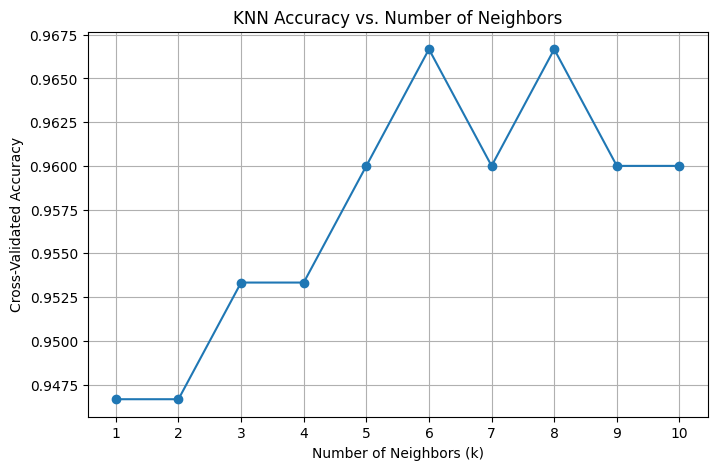

In [ ]:
# Extract results
results = classifier.cv_results_

# Plot mean test scores for each value of k
plt.figure(figsize=(8, 5))
plt.plot(search_space[0]["knn__n_neighbors"],
         results["mean_test_score"],
         marker="o", linestyle="-")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.xticks(search_space[0]["knn__n_neighbors"])
plt.grid(True)
plt.show()